# Energy efficiency prediction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:

%cd /content/drive/MyDrive/EnergyEfficiencyPrediction-main

/content/drive/.shortcut-targets-by-id/1cT2s2wEb0uHkjHwSMjLLnMoagiApb-JE/EnergyEfficiencyPrediction-main


## Load data

In [4]:
import pandas as pd

seed = 42
test_size = 0.2

In [5]:

listings_df = pd.read_csv('data/Listings_FE.csv')
print(listings_df.columns)
display(listings_df)
print(listings_df['Listing Description'])

Index(['Advertisement Id', 'Advertisement Version Id',
       'Day of Advertisement Created', 'Day of Date Available From',
       'Geo Canton', 'Geo City', 'Geo Zip', 'PropertyID', 'Are Pets Allowed',
       'Category Idx', 'Floor', 'Form Lead Unique', 'Has Balcony',
       'Has Cabletv', 'Has Elevator', 'Has Fireplace', 'Has Garage',
       'Has Parking', 'Is New Construction', 'Is New Construction Potential',
       'Is Tenant2Tenant', 'Is Wheelchairaccessible', 'Jahr',
       'Leerwohnungsziffer', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Rent_hypothetical', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated', 'Akonto_M2_Normalized',
       'PropertyFE', 'Property Reference Id'],
      dtype='object')


,Advertisement Id,Advertisement Version Id,Day of Advertisement Created,Day of Date Available From,Geo Canton,Geo City,Geo Zip,PropertyID,Are Pets Allowed,Category Idx,...,Price M2 Normalized,Price Net Normalized,Rent_hypothetical,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated,Akonto_M2_Normalized,PropertyFE,Property Reference Id
0,105369788,11,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,16.0,1100.0,NaN,81.0,Apartment,NaN,NaN,2.901235,118.808888,9393.61.5829
1,105369788,12,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,15.0,1100.0,NaN,81.0,Apartment,NaN,NaN,1.851852,118.808888,9393.61.5829
2,105380808,15,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
3,105380808,16,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
4,105380808,18,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94221,3001857722,1,2022-05-10 02:00:00,"August 1, 2022",AG,Kölliken,5742,5608,1.0,APPT,...,17.0,1350.0,NaN,94.0,Apartment,1995.0,NaN,2.765957,78.672787,5608.61.9754
94222,3001857723,1,2022-05-10 02:00:00,"June 1, 2022",VD,Montreux,1820,7461,NaN,APPT,...,20.0,1850.0,NaN,115.0,Apartment,1991.0,2008.0,3.478261,116.051448,7461.83.9894
94223,3001857724,1,2022-05-10 02:00:00,"May 1, 2022",ZH,Zürich,8048,9198,1.0,APPT,...,37.0,1420.0,NaN,40.0,Apartment,1977.0,2014.0,1.600000,92.338857,9198.61.5606
94224,3001857725,2,2022-05-10 02:00:00,"August 1, 2022",ZH,Zürich,8047,2970,NaN,APPT,...,35.0,2885.0,NaN,91.0,Apartment,1948.0,1997.0,2.912088,39.669587,2970.61.7877


0        Au coeur d'un quartier calme et verdoyant, ce ...
1        Au coeur d'un quartier calme et verdoyant, ce ...
2        Affittiamo appartamento di 4.5 locali in zona ...
3        Affittiamo appartamento di 4.5 locali in zona ...
4        Affittiamo bellissimo appartamento di 4.5 loca...
                               ...                        
94221    Per 01.08.2022 oder nach Vereinbarung vermiete...
94222    Appartement dans un immeuble des années 90, id...
94223    Wir vermieten eine helle 1.5-Zimmerwohnung an ...
94224    Die 3-Zimmer-Maisonettewohnung mit Loft-Charak...
94225    Wir vermieten an der Viaduktstrasse 6 in Heris...
Name: Listing Description, Length: 94226, dtype: object


In [6]:
"""properties_train = pd.read_csv('data/train_data_properties2.csv')['Property Reference Id'].unique().tolist()
properties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()

# select the properties that are in the train and test sets
text_train = listings_df[listings_df['Property Reference Id'].isin(properties_train)]
text_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]


# only keep the last advertisement version
text_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]
text_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]


# delete the rows where the text is empty
text_train = text_train.dropna(subset=['Listing Description'])

# sort the sets according to original split
text_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, ordered=True)
text_train = text_train.sort_values('Property Reference Id')

text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)
text_test = text_test.sort_values('Property Reference Id')
"""


"properties_train = pd.read_csv('data/train_data_properties2.csv')['Property Reference Id'].unique().tolist()\nproperties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()\n\n# select the properties that are in the train and test sets\ntext_train = listings_df[listings_df['Property Reference Id'].isin(properties_train)]\ntext_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]\n\n\n# only keep the last advertisement version\ntext_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]\ntext_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]\n\n\n# delete the rows where the text is empty\ntext_train = text_train.dropna(subset=['Listing Description'])\n\n# sort the sets according to original split\ntext_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, or

In [7]:

import pandas as pd

# Load the data
properties_train = listings_df['Property Reference Id'].unique().tolist()
properties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()

# Filter the properties to get text_train and text_test
text_train = listings_df[~listings_df['Property Reference Id'].isin(properties_test)]  # Keep all except test data
text_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]

# Only keep the last advertisement version
#text_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]
#text_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]

# Delete the rows where the text is empty
text_train = text_train.dropna(subset=['Listing Description'])

# Sort the sets according to the original split
text_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, ordered=True)
text_train = text_train.sort_values('Property Reference Id')

text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)
text_test = text_test.sort_values('Property Reference Id')

# Now text_train contains all the data except for the test data and sorted accordingly


<ipython-input-7-e9fe4d5284ea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, ordered=True)
<ipython-input-7-e9fe4d5284ea>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)


In [8]:
print(text_test)

       Advertisement Id  Advertisement Version Id  \
90893        3001661743                         1   
856           106079200                         4   
92056        3001704202                         1   
79633        3000952725                         1   
39369        2147635637                         1   
...                 ...                       ...   
965           106119419                         1   
23442         108168653                         2   
16706         107315191                         1   
16707         107315191                         2   
32113         108985151                         2   

      Day of Advertisement Created Day of Date Available From Geo Canton  \
90893          2022-02-03 01:00:00                May 1, 2022         AG   
856            2016-10-19 02:00:00                        NaN         AG   
92056          2022-02-23 01:00:00                May 1, 2022         AG   
79633          2021-03-10 01:00:00              April 1, 20

In [9]:
%cd text

/content/drive/.shortcut-targets-by-id/1cT2s2wEb0uHkjHwSMjLLnMoagiApb-JE/EnergyEfficiencyPrediction-main/text


In [9]:
%ls

energy_efficiency.ipynb  expanded_bert.py  __pycache__/      text_predictions.csv
expanded_bert.ipynb      model/            regression_FE.py


# Gilles Bert Model

In [14]:
from regression_FE import *
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
import pandas as pd

# Parameters
MAX_LEN = 500
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 15
LEARNING_RATE = 2e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BERTRegressor('bert-base-multilingual-cased').to(device)

# Create the dataset
train_dataset = ListingsDataset(text_train, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = ListingsDataset(text_test, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Loss function
criterion = nn.MSELoss()

In [ ]:
# Train and save the model
train(model, train_loader, test_loader, criterion, optimizer, device, EPOCHS, save_path="model/text_model_full.pth")


Training:  27%|██▋       | 2742/10233 [12:50<35:28,  3.52it/s]

In [ ]:
import torch
saved_model = BERTRegressor('bert-base-multilingual-cased')
saved_model.load_state_dict(torch.load('model/text_model_full.pth'))
saved_model.to(device)

In [ ]:
eval_model(saved_model, test_loader, criterion, device)

In [ ]:
# save the predictions
predictions = []
labels = []

saved_model.eval()
with torch.no_grad():
    for d in test_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = saved_model(input_ids=input_ids, attention_mask=attention_mask)
        predictions.extend(outputs.cpu().numpy().flatten().tolist())
        labels.extend(d["targets"].cpu().numpy().flatten().tolist())


predictions_df = pd.DataFrame({
    'Property Reference Id': properties_test,
    'Predicted FE': predictions,
    'Actual FE': labels
})

print(predictions_df)

predictions_df.to_csv("text_predictions.csv")


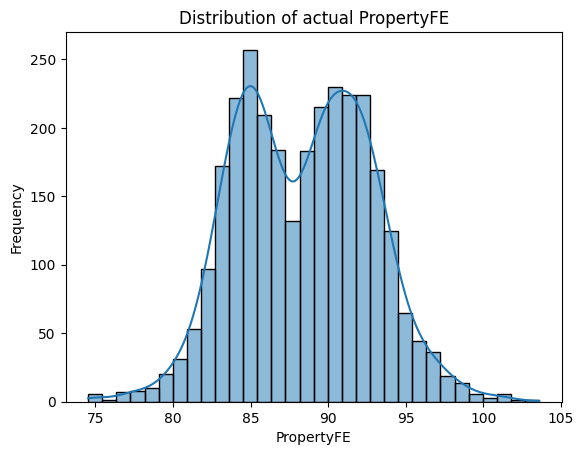

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(predictions_df['Predicted FE'].tolist(), kde=True)
plt.title('Distribution of actual PropertyFE')
plt.xlabel('PropertyFE')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

mean_actual = predictions_df['Actual FE'].mean()

mean_predictions = np.full_like(predictions_df['Actual FE'], mean_actual)

mse = np.mean((predictions_df['Actual FE'] - mean_predictions) ** 2)

print("Baseline Mean Squared Error (MSE) when only predicting the mean:", mse)

Baseline Mean Squared Error (MSE) when only predicting the mean: 943.9550822352422


# Bert using expanded Keywords

In [18]:
!pip install keybert

In [12]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TextClassificationPipeline, BertTokenizer, AdamW
#from keybert import KeyBERT
#from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import random
import numpy as np
from tqdm import tqdm
from collections import Counter
from expanded_bert import BERTRegressor, train_epoch, eval_model

In [ ]:


# Step 1: Define Initial Keywords
initial_keywords = [
    "energy efficient", "eco-friendly", "solar", "renewable", "sustainable",
    "green building", "insulation", "LED lighting", "low energy", "passive house",
    "energy star", "environmentally friendly", "recycling", "water conservation",
    "wind power", "geothermal", "smart thermostat", "double glazing", "solar panels",
    "energy saving", "carbon footprint", "sustainable materials", "biodegradable",
    "eco-conscious", "green technology", "low carbon", "energy management", "zero emissions"
]

# Step 2: Load Pre-trained RoBERTa Model and Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Step 3: Create Classification Pipeline
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Step 4: Classify Topics in Listing Descriptions
def classify_topic(text):
    try:
        max_length = tokenizer.model_max_length - 2  # Adjusting for special tokens
        tokens = tokenizer.tokenize(text)

        if len(tokens) > max_length:
            chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
        else:
            chunks = [tokens]

        results = []

        for chunk in chunks:
            chunk_text = tokenizer.convert_tokens_to_string(chunk)
            result = classifier(chunk_text, truncation=True)
            results.append(result)

        # Aggregate results and find the label with the highest average score
        aggregated_scores = {}
        for result in results:
            for item in result:
                label = item['label']
                score = item['score']
                if label not in aggregated_scores:
                    aggregated_scores[label] = []
                aggregated_scores[label].append(score)

        avg_scores = {label: sum(scores) / len(scores) for label, scores in aggregated_scores.items()}
        best_label = max(avg_scores, key=avg_scores.get)

        return best_label
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {e}")
        return None

# Step 5: Extract Keywords Using KeyBERT
kw_model = KeyBERT('all-MiniLM-L6-v2')

def extract_keywords(text):
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)
    return [kw[0] for kw in keywords]

# Step 6: Generate Embeddings for Keywords and Listing Descriptions
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Load the training data (assuming `text_train` DataFrame is already prepared)
descriptions = text_train['Listing Description'].tolist()

# Generate embeddings
keyword_phrases = initial_keywords
keyword_embeddings = embedding_model.encode(keyword_phrases, show_progress_bar=True)
description_embeddings = embedding_model.encode(descriptions, show_progress_bar=True)

# Step 7: Calculate Cosine Similarity
similarities = cosine_similarity(keyword_embeddings, description_embeddings)

# Step 8: Get Relevant Terms
def get_relevant_terms(similarities, keyword_phrases, descriptions, top_n=10):
    relevant_terms = {keyword: [] for keyword in keyword_phrases}
    for idx, keyword in enumerate(keyword_phrases):
        similar_indices = similarities[idx].argsort()[-top_n:][::-1]
        similar_sentences = [descriptions[i] for i in similar_indices]
        extracted_keywords = extract_keywords(' '.join(similar_sentences))
        relevant_terms[keyword].extend(extracted_keywords)
    return relevant_terms

relevant_terms = get_relevant_terms(similarities, keyword_phrases, descriptions)

# Step 9: Expand Keywords
def expand_keywords(initial_keywords, relevant_terms, target_size=100):
    expanded_keywords = set(initial_keywords)
    for keyword in initial_keywords:
        if keyword in relevant_terms:
            expanded_keywords.update(relevant_terms[keyword])

    if len(expanded_keywords) > target_size:
        expanded_keywords = list(expanded_keywords)[:target_size]
    elif len(expanded_keywords) < target_size:
        additional_keywords = list(expanded_keywords)
        while len(expanded_keywords) < target_size:
            expanded_keywords.add(random.choice(additional_keywords))

    return list(expanded_keywords)

expanded_keywords = expand_keywords(initial_keywords, relevant_terms, target_size=100)



In [ ]:
# Expanded keywords obtained
expanded_keywords

In [13]:
# Expanded Keywords cleaned
expanded_keywords = ['br wohnungen',
 'water conservation',
 'mitbenutzung',
 'fahrradraum',
 'temperatura',
 'keine parkplätze',
 'verschiedene wohnungen',
 'tumbler br',
 'br wohnzimmer',
 'wohnbereich küche',
 'recyclingssystem br',
 'sustainable materials',
 'bahnhof',
 'bushaltestelle',
 'glaskeramikherd',
 'greencity',
 'solar panels',
 'spazieren grillieren',
 'sustainable',
 'verbindungen nach',
 'recyclingsystem',
 'eco-friendly',
 'park',
 'geräumiger eingangsbereich',
 'geschirrspüler',
 'steamer geschirrspüler',
 'granitabdeckung',
 'terrasse',
 'zimmerwohnungen',
 'bahn',
 'solaranlage',
 'grosszahl einkaufsmöglichkeiten',
 'geräumiger',
 'et convivial',
 'nasszellen',
 'green building',
 'plattenboden',
 'passive house',
 'einbaubackofen',
 'steamer',
 'recycling',
 'lichtdurchflutetes',
 'energetisch optimiert',
 'bahnhofs',
 'solar',
 'windschutzverglasung',
 'chipsystem',
 'wind power',
 'keramische bodenplatten',
 'glaskeramikherd',
 'warmwasseraufbereitung',
 'und warmwasseraufbereitung',
 '2021 oder',
 'lumineux',
 'greencity bilden']

In [22]:
# save expanded keywords to csv
with open('expanded_keywords.csv', 'w') as f:
    f.write('\n'.join(expanded_keywords))

In [14]:
# Step 10: Integrate Expanded Keywords in the Dataset
def count_keywords(description, keywords):
    if isinstance(description, float) and pd.isna(description):
        return 0
    count = 0
    description = str(description).lower()
    for keyword in keywords:
        count += description.count(keyword)
    return count

text_train['keyword_count'] = text_train['Listing Description'].apply(lambda x: count_keywords(x, expanded_keywords))
text_test['keyword_count'] = text_test['Listing Description'].apply(lambda x: count_keywords(x, expanded_keywords))


In [13]:
# Step 11: Modify the Dataset Class
class ListingsDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        description = str(self.data.iloc[index]['Listing Description'])
        target = self.data.iloc[index]['PropertyFE']
        keyword_count = self.data.iloc[index]['keyword_count']

        encoding = self.tokenizer(
            description,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'keyword_count': torch.tensor(keyword_count, dtype=torch.float),
            'targets': torch.tensor(target, dtype=torch.float)
        }


In [14]:
from regression_FE import *
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
import pandas as pd

# Step 12: Initialize and Train the Model
# Parameters
MAX_LEN = 500
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 1
LEARNING_RATE = 2e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BERTRegressor('bert-base-multilingual-cased').to(device)

train_dataset = ListingsDataset(text_train, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = ListingsDataset(text_test, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [15]:

# Train and save the model
def train(model, train_loader, test_loader, criterion, optimizer, device, epochs, save_path=None):
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        print(f'Epoch {epoch + 1}/{epochs}')
        print(f'Train loss: {train_loss}')
        test_loss = eval_model(model, test_loader, criterion, device)
        print(f'Test loss: {test_loss}')

        if save_path:
            torch.save(model.state_dict(), save_path)
            print(f'Model saved at epoch {epoch + 1} with test loss {test_loss}')




In [16]:
train(model, train_loader, test_loader, criterion, optimizer, device, EPOCHS, save_path="model/text_model_full.pth")


Training:   0%|          | 0/2559 [00:14<?, ?it/s]


KeyboardInterrupt: 

# test

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, AdamW
import torch.nn as nn
import numpy as np
from tqdm import tqdm

# Define your BERTRegressor and other necessary classes and functions here

class ListingsDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        description = str(self.data.iloc[index]['Listing Description'])
        target = self.data.iloc[index]['PropertyFE']
        keyword_count = self.data.iloc[index]['keyword_count']

        encoding = self.tokenizer(
            description,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'keyword_count': torch.tensor(keyword_count, dtype=torch.float),
            'targets': torch.tensor(target, dtype=torch.float)
        }

# Define the BERTRegressor model
class BERTRegressor(nn.Module):
    def __init__(self, bert_model):
        super(BERTRegressor, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.regressor = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size + 1, 128),  # +1 for the keyword count
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask, keyword_count):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]
        combined_output = torch.cat((pooled_output, keyword_count.unsqueeze(1)), dim=1)
        return self.regressor(combined_output)

# Initialize model, optimizer, and criterion
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTRegressor('bert-base-multilingual-cased').to(device)
optimizer = AdamW(model.parameters(), lr=2e-4)
criterion = nn.MSELoss()

# Initialize GradScaler
scaler = torch.cuda.amp.GradScaler()

# Training function with mixed precision
def train_epoch(model, data_loader, criterion, optimizer, scaler, device):
    model = model.train()
    losses = []
    for _, d in enumerate(tqdm(data_loader, desc="Training")):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        keyword_count = d["keyword_count"].to(device)
        targets = d["targets"].to(device)

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, keyword_count=keyword_count)
            loss = criterion(outputs.squeeze(1), targets.float())

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        losses.append(loss.item())

    return np.mean(losses)

# Evaluation function with mixed precision
def eval_model(model, data_loader, criterion, device):
    model = model.eval()
    losses = []
    predictions = []
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            keyword_count = d["keyword_count"].to(device)
            targets = d["targets"].to(device)

            with torch.cuda.amp.autocast():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, keyword_count=keyword_count)
                loss = criterion(outputs, targets.unsqueeze(1))
                predictions.extend(outputs.cpu().detach().numpy())

            losses.append(loss.item())
    return np.mean(losses)

# Training loop function
def train(model, train_loader, test_loader, criterion, optimizer, scaler, device, epochs, save_path=None):
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, scaler, device)
        print(f'Epoch {epoch + 1}/{epochs}')
        print(f'Train loss: {train_loss}')

        test_loss = eval_model(model, test_loader, criterion, device)
        print(f'Test loss: {test_loss}')

        if save_path:
            torch.save(model.state_dict(), save_path)
            print(f'Model saved at epoch {epoch + 1} with test loss {test_loss}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [20]:
# Define Parameters
MAX_LEN = 500
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
EPOCHS = 15
LEARNING_RATE = 2e-4

# Load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Create the dataset
train_dataset = ListingsDataset(text_train, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = ListingsDataset(text_test, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)


In [21]:
train(model, train_loader, test_loader, criterion, optimizer, scaler, device, EPOCHS, save_path="model/text_model_full.pth")


Training:   5%|▌         | 266/5117 [01:45<32:06,  2.52it/s]


KeyboardInterrupt: 